# Exploring German MultiPic & Additional Metadata
This notebook aims to explore the possibilities with and limitations of the MultiPic database versions (Duñabeitia et al. 2018, Duñabeitia et al. 2022) for the purpose of finding 150 stimuli pictures for an upcoming experiment. The stimuli should meet certain requirements, like having an overall balanced rate of early and late acquired words. Therefore, it is crucial to investigate with which information the MutliPic database is equipped from the start and which metadata could be appended additionally (and ideally, efficiently) from other sources in order to end up with a collection of stimuli pictures/words that come with the information we need.

In [1]:
# load packages
import pandas as pd
import numpy as np

We start by loading versions 1 (Duñabeitia et al. 2018) and 5 (Duñabeitia et al. 2022) of the MultiPic database as dataframes so we can look at them efficiently.

You can download the databases here: 
- https://www.bcbl.eu/databases/multipic/ (Version 1)
- https://figshare.com/articles/dataset/Untitled_Item/19328939/5 (Version 5)

or use the script for downloading databases in `../../external_resources/`.

In [2]:
# define MultiPic paths
# might need to be adapted
vers_1_path = '../../external_resources/multipic/German_MultiPic_version1.csv'
vers_5_path = '../../external_resources/multipic/MultiPic_version5.csv'

# create dataframes for + load MultiPic versions
vers_1 = pd.read_csv(vers_1_path,sep=';', decimal=',') 
vers_5 = pd.read_csv(vers_5_path,sep=';', decimal=',') 

# limit vers. 5 to German
vers_5 = vers_5[vers_5['Language']=='German']
vers_5.reset_index(inplace=True, drop=True)
# turn some floats into integers
dtypes_5 = ['Code','Number of Responses','"I don\'t know" Response Percentage',
            'Idiosyncratic Response Percentage']
for col in dtypes_5:
    vers_5[col] = vers_5[col].astype(int, copy=False) 

# drop redundant columns
vers_1.drop(columns=['PICTURE'], inplace=True)
vers_5.drop(columns=['Language'], inplace=True)

Check dataframes:

In [3]:
vers_1.head()

,ITEM,NAME1,NAME2,H_INDEX,PERCENTAGE_MODAL_NAME,PERCENTAGE_VALID_RESPONSES,NUMBER_DIFFERENT_RESPONSES,PERCENTAGE_UNKNOWN_RESPONSES,PERCENTAGE_IDIOSYNCRATIC_RESPONSES,VISUAL_COMPLEXITY
0,1,maus,NaN,0.000000,100.000000,97,1,0,3,3.02
1,2,reifen,NaN,1.163235,69.696970,99,3,0,1,2.67
2,3,treppenstufe,NaN,1.426663,46.464646,99,3,0,1,1.89
3,4,altar,NaN,0.968778,77.319588,97,4,1,2,3.40
4,5,schulter,NaN,0.862355,82.978723,94,4,1,5,2.01


In [4]:
vers_5.head()

,Code,Number of Responses,H Statistic,Modal Response,Modal Response Percentage,"""I don't know"" Response Percentage",Idiosyncratic Response Percentage,Familiarity
0,1,100,0.000000,maus,100.000000,0,3,NaN
1,4,100,0.968778,altar,77.319588,1,2,NaN
2,5,100,0.862355,schulter,82.978723,1,5,NaN
3,6,100,0.445050,kinn,92.783505,1,2,NaN
4,7,100,0.143726,fee,97.959184,0,2,NaN


In [5]:
print(f'There are {np.sum(vers_5.Familiarity.notna())} actual values for the familiarity rating.')

There are 0 actual values for the familiarity rating.


The German MultiPic database version 5 does not contain familiarity measures, an additional information we would like to have for our stimuli. This begs the question, is it even new data or did the authors reuse the German information collected in version 1?

### Compare version 1 and version 5 of MultiPic
Are there differences between the German entries of the MultiPic versions 1 and 5? If yes, where?

In [6]:
vers_1_compare = vers_1.copy(deep=True)
# rename columns in order to be able to compare dataframes
columns_dict = {'ITEM': 'Code', 
    'NAME1':'Modal Response', 
    'H_INDEX': 'H Statistic',
    'PERCENTAGE_MODAL_NAME': 'Modal Response Percentage', 
    'PERCENTAGE_UNKNOWN_RESPONSES': '"I don\'t know" Response Percentage', 
    'PERCENTAGE_IDIOSYNCRATIC_RESPONSES': 'Idiosyncratic Response Percentage'}
vers_1_compare.rename(columns=columns_dict, inplace=True)
# select relevant rows
vers_1_compare = vers_1_compare[vers_1_compare['Code'].isin(vers_5['Code'].values)]
vers_1_compare.reset_index(drop=True, inplace=True)

# compare version 1 and 5 regarding the features they have in common
vers_1_compare[columns_dict.values()].compare(vers_5[columns_dict.values()])

Modal Response                    
              self               other
124    fliegenpilz  fliegenpilz / pilz

In [7]:
vers_1.loc[vers_1['NAME1'] == 'fliegenpilz']

,ITEM,NAME1,NAME2,H_INDEX,PERCENTAGE_MODAL_NAME,PERCENTAGE_VALID_RESPONSES,NUMBER_DIFFERENT_RESPONSES,PERCENTAGE_UNKNOWN_RESPONSES,PERCENTAGE_IDIOSYNCRATIC_RESPONSES,VISUAL_COMPLEXITY
176,177,fliegenpilz,pilz,1.0,50.0,98,2,1,1,2.14


Only the depiction of picture names / the modal response is different. Otherwise those two database versions are identical in the features that they share.

This makes us wonder: is it the same for all the seven original languages collected in MultiPic version 1? Do none of those languages come with familiarity measures?

In [8]:
original_langs = set(['British English','Belgium Dutch','French','German',
                'Italian','Netherlands Dutch','Spanish'])
# load MultiPic databse version 5 
vers_5_originals = pd.read_csv(vers_5_path, sep=';', decimal=',') 
# limit it to all languages that were already present in version 1
vers_5_originals = vers_5_originals[vers_5_originals['Language'].isin(original_langs)]

# check for familiarity rating entries
print(f'There are {np.sum(vers_5_originals.Familiarity.notna())} actual values for the familiarity rating in the languages from the original database.')

There are 0 actual values for the familiarity rating in the languages from the original database.


It seems the authors really just appended the original database to the new version.

In Duñabeitia et al. (2022) it is mentioned that familiarity rating scores for German can be obtained through a database compiled by Schröder et al. (2011). So let's check it out:

### Schröder et. al (2011): German norms for semantic typicality, age of acquisition, and concept familiarity
The promising thing about this corpus is that it not only contains familiarity ratings, but also age of acquisition ratings, and information on word frequencies and word lengths -- other metadata we are also interested in. If applicable, it would be great to combine this corpus' information with MultiPic's. But how big is the overlap of the words used in the Schröder et al. (2011) corpus and the MultiPic database?

You can download the database here: https://link.springer.com/article/10.3758/s13428-011-0164-y#SecESM1

In [9]:
# define path
ger_norms_path = '../../external_resources/norms/Schröder_2012.xls'

# load data
ger_norms = pd.read_excel(ger_norms_path, header=[0,1])
# rename empty headers to access first three columns via multi index
# also delete spaces at the end of column names for convenience
ger_norms.rename(columns={'Unnamed: 0_level_0': 'lex_ger', 
                'Unnamed: 1_level_0': 'lex_en', 'Unnamed: 2_level_0': 'sem_cat', 
                'GERMAN ': 'GERMAN', 'M ': 'M', 'SD ': 'SD'}, inplace=True)

In [10]:
# define function to lowercase a string and remove umlauts
def remove_umlauts(string):
    """ Removes umlauts and ß and lowercases strings.
    Input:
        string: A string.
    Output:
        new_string: Same string in lowercase and without umlauts.
    """
    umlauts = {'ä':'ae','ö':'oe','ü':'ue','ß':'ss'}
    new_string = string.lower()
    for umlaut in umlauts:
        new_string = new_string.replace(umlaut, umlauts[umlaut])
    return new_string

In [11]:
# to make it more comparable to the other database: 
# lowercase entries + remove umlauts
for i in ger_norms['lex_ger','GERMAN'].index:
    cleaned_string = remove_umlauts(ger_norms.loc[i,('lex_ger','GERMAN')])
    ger_norms.loc[i,('lex_ger','GERMAN')] = cleaned_string

In [12]:
# check out dataframe
ger_norms.head()

lex_ger                        lex_en           sem_cat  \
       GERMAN TRANSLATION (British English) semantic category   
0      ameise                           ant            animal   
1    antilope                      antelope            animal   
2       dachs                        badger            animal   
3  fledermaus                           bat            animal   
4        baer                          bear            animal   

  EXEMPLAR GENERATION STUDY         TYPICALITY RATING (scale 1-7)            \
           nb total (n= 20) % total                             M        SD   
0                         8    0.40                          2.75  1.888330   
1                         7    0.35                          2.95  1.700619   
2                         4    0.20                          2.85  1.814416   
3                         3    0.15                          2.75  1.650359   
4                        12    0.60                          1.20  0.894427   

  AGE OF ACQUISITION RATING (scale 1-7)            \
                                      M        SD   
0                                  2.00  0.648886   
1                                  4.00  1.213954   
2                                  3.60  1.046297   
3                                  3.60  1.391705   
4                                  1.75  0.850696   

  FAMILIARITY RATING (scale 1-5)            \
                               M        SD   
0                       3.800000  1.056309   
1                       2.263158  1.284182   
2                       2.650000  1.182103   
3                       2.800000  1.196486   
4                       3.250000  1.332785   

                   WORD FREQUENCY (DLEXDB)                                   \
  normalized lemma frequency (per million) normalized log10 lemma frequency   
0                                 5.379202                         0.730718   
1                                 1.119986                         0.049213   
2                                 2.427998                         0.385248   
3                                 4.406368                         0.644081   
4                                  10.3333                         1.014239   

  WORD LENGTH               
  nb PHONEMES nb SYLLABLES  
0           5            3  
1           8            4  
2           4            1  
3           8            3  
4           3            1

First, let's check how many German word entries overlap between MultiPic version 1 and the Schröder (2012) corpus:

In [13]:
# get values from databases
# german norms
ger_norms_values = set(ger_norms['lex_ger','GERMAN'].values)

# MultiPic vers. 1
name1_vals = set(vers_1['NAME1'].values)
name2_vals = set(vers_1['NAME2'].values)
name2_vals.remove(np.nan)
# combine entries from NAME1 and NAME2 columns
vers_1_values = name1_vals.union(name2_vals)

# check the overlap between the databases
present_vers_1 = vers_1_values.intersection(ger_norms_values)
not_present_vers_1 = vers_1_values.difference(present_vers_1)
print('For the MultiPic version 1 (Duñabeitia et al. 2018), when considering both NAME1 and NAME2,\n',
        len(present_vers_1),'familiarity measures can be inferred and',
        len(not_present_vers_1),'can\'t be inferred from the Schröder (2012) database.')
print('Only considering NAME1,', len(name1_vals.intersection(ger_norms_values)), 'values can be inferred.')

For the MultiPic version 1 (Duñabeitia et al. 2018), when considering both NAME1 and NAME2,
 172 familiarity measures can be inferred and 542 can't be inferred from the Schröder (2012) database.
Only considering NAME1, 172 values can be inferred.


How much do those 172 entries overlap with the entries in MultiPic vers. 5?

In [14]:
# get values
vers_5_values = set(vers_5['Modal Response'])
# compare
present_vers_5 = present_vers_1.intersection(vers_5_values)
not_present_vers_5 = vers_1_values.difference(vers_5_values)
print(len(present_vers_5),'out of 500 MultiPic version 5 entries (Duñabeitia et al. 2022) could get familiarity information,',
    len(not_present_vers_5),'can\'t.')

134 out of 500 MultiPic version 5 entries (Duñabeitia et al. 2022) could get familiarity information, 223 can't.


### Visualisation of the characteristics of items present in MultiPic and Schröder 2011

First: combine all information for an item from MultiPic vers. 1 and the Schröder 2011 database.

In [15]:
# make MultiPic dataframe with multi index so it can be combined with Schröder 2011
multi_index = [['MultiPic' for i in vers_1.columns], vers_1.columns]
multi_index_df = pd.DataFrame(columns=multi_index)
for column in multi_index_df['MultiPic'].columns:
    multi_index_df['MultiPic',column] = vers_1[column]
# rename Schröder 2011's GERMAN column for easier merge of dataframes
ger_norms.rename(columns={'lex_ger': 'MultiPic', 'GERMAN': 'NAME1'}, inplace=True)
# create big dataframe
info_df = pd.merge(multi_index_df, ger_norms, how='inner', on=[('MultiPic','NAME1')])

In [16]:
info_df.describe()

MultiPic                                    \
             ITEM     H_INDEX PERCENTAGE_MODAL_NAME   
count  190.000000  190.000000            190.000000   
mean   379.431579    0.643456             84.342061   
std    215.191051    0.601920             16.676899   
min      1.000000    0.000000             40.625000   
25%    199.250000    0.141724             73.264254   
50%    375.000000    0.505528             91.000000   
75%    572.250000    1.083892             97.994949   
max    748.000000    2.403660            100.000000   

                                                             \
      PERCENTAGE_VALID_RESPONSES NUMBER_DIFFERENT_RESPONSES   
count                 190.000000                 190.000000   
mean                   96.963158                   2.889474   
std                     3.913578                   1.863999   
min                    73.000000                   1.000000   
25%                    96.000000                   2.000000   
50%                    98.000000                   2.000000   
75%                    99.000000                   4.000000   
max                   100.000000                  10.000000   

                                                                       \
      PERCENTAGE_UNKNOWN_RESPONSES PERCENTAGE_IDIOSYNCRATIC_RESPONSES   
count                   190.000000                         190.000000   
mean                      0.884211                           2.152632   
std                       2.349662                           2.116418   
min                       0.000000                           0.000000   
25%                       0.000000                           1.000000   
50%                       0.000000                           2.000000   
75%                       1.000000                           3.000000   
max                      19.000000                          10.000000   

                        EXEMPLAR GENERATION STUDY              \
      VISUAL_COMPLEXITY          nb total (n= 20)     % total   
count        190.000000                190.000000  190.000000   
mean           2.876684                 10.015789    0.498947   
std            0.528105                  5.451543    0.268986   
min            1.730000                  1.000000    0.050000   
25%            2.462500                  5.000000    0.250000   
50%            2.900000                 10.000000    0.500000   
75%            3.277500                 14.000000    0.700000   
max            3.870000                 24.000000    1.000000   

      TYPICALITY RATING (scale 1-7)              \
                                  M          SD   
count                    190.000000  190.000000   
mean                       2.166936    1.223691   
std                        1.046015    0.532085   
min                        1.000000    0.000000   
25%                        1.350000    0.888523   
50%                        1.950000    1.293201   
75%                        2.537500    1.691282   
max                        5.736842    1.980829   

      AGE OF ACQUISITION RATING (scale 1-7)              \
                                          M          SD   
count                            190.000000  190.000000   
mean                               2.768592    0.967357   
std                                1.028824    0.377189   
min                                1.250000    0.444262   
25%                                2.012500    0.656947   
50%                                2.500000    0.833509   
75%                                3.300000    1.301821   
max                                6.000000    1.982379   

      FAMILIARITY RATING (scale 1-5)             WORD LENGTH               
                                   M          SD nb PHONEMES nb SYLLABLES  
count                     190.000000  190.000000  190.000000   190.000000  
mean                        3.607264    1.074000    5.300000     2.110526  
std                         0.731055   

It is curious that in our set comparison we discovered that MultiPic version 1 and the Schröder 2011 database have 172 items in common, but in our item-based merged dataframe we have 189 entries. Are there any duplicate target words?

In [17]:
# check for duplicates
duplicate_rows = info_df[info_df.duplicated(subset=('MultiPic','NAME1'),keep=False)]
duplicate_values = set(duplicate_rows['MultiPic','NAME1'].values)
print(f"There are {len(duplicate_rows)} duplicate word entries.")
print(f"This concerns the words {duplicate_values}.")

There are 36 duplicate word entries.
This concerns the words {'pullover', 'handschuh', 'arzt', 'unterhose', 'schlange', 'kaefer', 'adler', 'krokodil', 'salat', 'zwiebel', 'gans', 'melone', 'ente', 'muschel', 'auto', 'messer', 'hase', 'huhn'}.


In [18]:
duplicate_rows.head()

MultiPic                                                  \
       ITEM     NAME1 NAME2   H_INDEX PERCENTAGE_MODAL_NAME   
5        26   zwiebel   NaN  0.000000            100.000000   
6       401   zwiebel   NaN  0.732753             79.452055   
7        36    kaefer   NaN  1.527834             70.526316   
8       211    kaefer   NaN  1.561485             60.824742   
35      133  schlange   NaN  1.234378             54.639175   

                                                          \
   PERCENTAGE_VALID_RESPONSES NUMBER_DIFFERENT_RESPONSES   
5                          95                          1   
6                          73                          2   
7                          95                          6   
8                          97                          5   
35                         97                          4   

                                                                    \
   PERCENTAGE_UNKNOWN_RESPONSES PERCENTAGE_IDIOSYNCRATIC_RESPONSES   
5                             1                                  4   
6                            19                                  8   
7                             2                                  3   
8                             2                                  1   
35                            0                                  3   

                      ... TYPICALITY RATING (scale 1-7)            \
   VISUAL_COMPLEXITY  ...                             M        SD   
5               2.86  ...                      1.750000  1.292692   
6               2.94  ...                      1.750000  1.292692   
7               2.99  ...                      3.105263  1.911798   
8               2.99  ...                      3.105263  1.911798   
35              3.31  ...                      2.300000  1.657519   

   AGE OF ACQUISITION RATING (scale 1-7)            \
                                       M        SD   
5                                    2.2  0.523148   
6                                    2.2  0.523148   
7                                    1.7  0.656947   
8                                    1.7  0.656947   
35                                   2.0  0.648886   

   FAMILIARITY RATING (scale 1-5)            \
                                M        SD   
5                            4.55  0.686333   
6                            4.55  0.686333   
7                            3.50  1.100239   
8                            3.50  1.100239   
35                           2.95  1.190975   

                    WORD FREQUENCY (DLEXDB)                                   \
   normalized lemma frequency (per million) normalized log10 lemma frequency   
5                                 10.496801                         1.021057   
6                                 10.496801                         1.021057   
7                                  5.837006                          0.76619   
8                                  5.837006                          0.76619   
35                                13.963035                          1.14498   

   WORD LENGTH               
   nb PHONEMES nb SYLLABLES  
5            6            2  
6            6            2  
7            4            2  
8            4            2  
35           5            2  

[5 rows x 24 columns]

It looks like the entries only differ in the MultiPic columns. To confirm:

In [19]:
# example investigation: zwiebel
# compare
info_df.loc[5].compare(info_df.loc[6])

self      other
MultiPic ITEM                                   26        401
         H_INDEX                               0.0   0.732753
         PERCENTAGE_MODAL_NAME               100.0  79.452055
         PERCENTAGE_VALID_RESPONSES             95         73
         NUMBER_DIFFERENT_RESPONSES              1          2
         PERCENTAGE_UNKNOWN_RESPONSES            1         19
         PERCENTAGE_IDIOSYNCRATIC_RESPONSES      4          8
         VISUAL_COMPLEXITY                    2.86       2.94

There are indeed 2 separate entries for 'zwiebel' with entirely different item numbers and other MultiPic values. This means of each of the duplicate entries we could choose the entry with values that are more fitting to our requirements, but it still leaves us with the initially discovered 172 unique intersecting items.

For now, let's choose the ones with higher name agreement.

In [20]:
h_index = ('MultiPic','H_INDEX')
dri = duplicate_rows.index
# iterate through every second duplicate index number
for i in range(0,len(dri),2):
    # if first word entry has higher name agreement (smaller H value), keep it (aka drop 2nd)
    # else keep the second entry (aka drop 1st)
    if duplicate_rows.loc[dri[i],h_index] <= duplicate_rows.loc[dri[i+1],h_index]:
        info_df.drop(index=i+1, inplace=True)
    else:
        info_df.drop(index=i, inplace=True)    
print('New info_df length:',len(info_df))

New info_df length: 172


Let's check out different distributions with the selection that we've made:

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

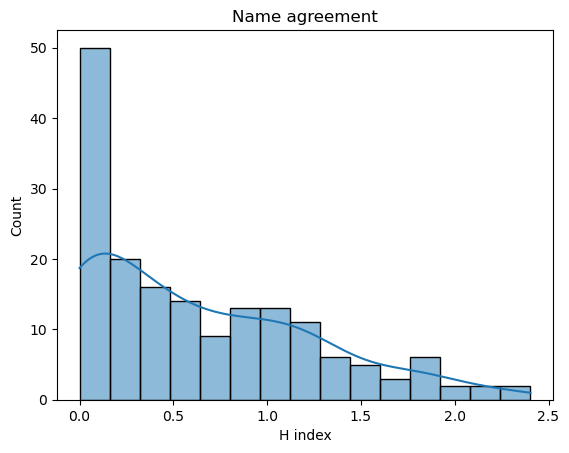

In [22]:
h = sns.histplot(data=info_df.loc[:,('MultiPic','H_INDEX')],bins=15,kde=True)
h.set(title='Name agreement',xlabel='H index')
plt.show()

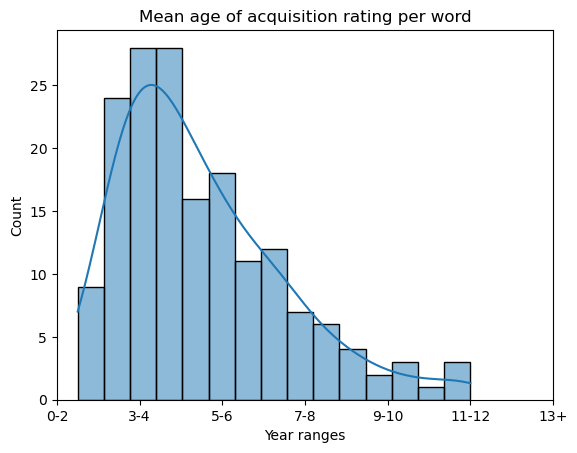

In [23]:
aoa = sns.histplot(data=info_df.loc[:,('AGE OF ACQUISITION RATING (scale 1-7)','M')],bins=15,kde=True)
aoa.set(title='Mean age of acquisition rating per word',xlabel='Year ranges')
aoa.set_xticks(range(1,8))
aoa.set_xticklabels(['0-2','3-4','5-6','7-8','9-10','11-12','13+'])
plt.show()

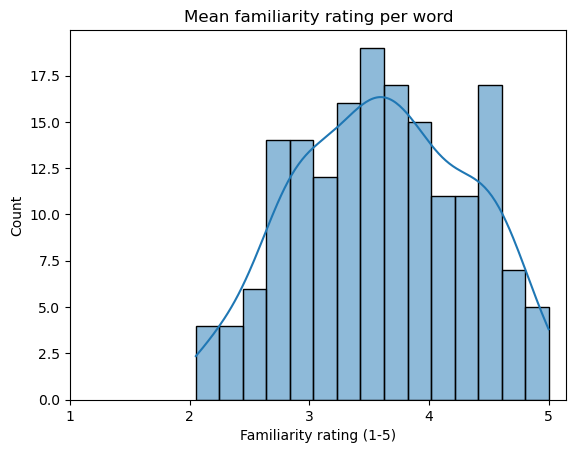

In [24]:
fr = sns.histplot(data=info_df.loc[:,('FAMILIARITY RATING (scale 1-5)','M')],bins=15,kde=True)
fr.set(title='Mean familiarity rating per word',xlabel='Familiarity rating (1-5)')
fr.set_xticks(range(1,6))
plt.show()

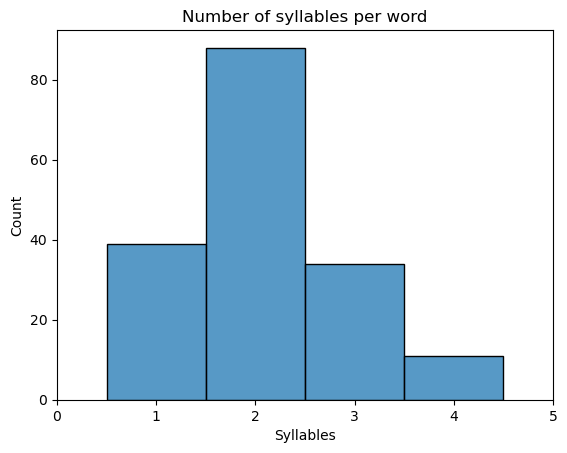

In [25]:
syl = sns.histplot(data=info_df.loc[:,('WORD LENGTH','nb SYLLABLES')],discrete=True)
syl.set(title='Number of syllables per word',xlabel='Syllables')
syl.set_xticks(range(6))
plt.show()

In [26]:
# replace 'None' values by -9 so it can be plotted
for i in info_df.index:
    if info_df.loc[i,('WORD FREQUENCY (DLEXDB)','normalized lemma frequency (per million)')] == 'None':
        info_df.loc[i,('WORD FREQUENCY (DLEXDB)','normalized lemma frequency (per million)')] = -9
    if info_df.loc[i,('WORD FREQUENCY (DLEXDB)','normalized log10 lemma frequency')] == 'None':
        info_df.loc[i,('WORD FREQUENCY (DLEXDB)','normalized log10 lemma frequency')] = -9
    

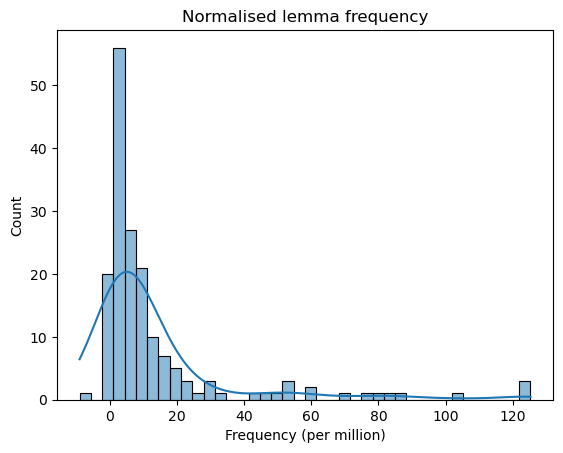

In [27]:
freq = sns.histplot(info_df[('WORD FREQUENCY (DLEXDB)','normalized lemma frequency (per million)')],kde=True)
freq.set(title='Normalised lemma frequency',xlabel='Frequency (per million)')
plt.show()

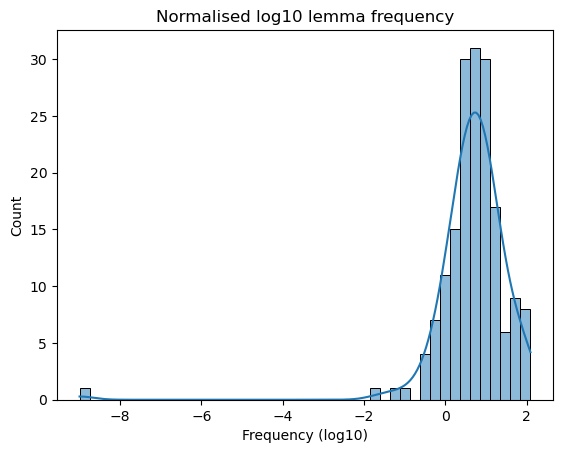

In [28]:
log_freq = sns.histplot(info_df[('WORD FREQUENCY (DLEXDB)','normalized log10 lemma frequency')],kde=True)
log_freq.set(title='Normalised log10 lemma frequency',xlabel='Frequency (log10)')
plt.show()

In [29]:
# check how many "good" items (H index <= 1) could be used
# with arbitrary early/late threshold of 2.5
early = 0
late = 0
h_early = 0
h_late = 0
for i in info_df.index:
    age = info_df.loc[i,('AGE OF ACQUISITION RATING (scale 1-7)','M')]
    h_index = info_df.loc[i,('MultiPic','H_INDEX')] 
    if age <= 2.5:
        early += 1
        if h_index <= 1:
            h_early += 1
    else:
        late += 1
        if h_index <= 1:
            h_late += 1
print("Early acquired words:",early,'\nLate acquired words:',late)
print("H early", h_early)
print('H late', h_late)

Early acquired words: 89 
Late acquired words: 83
H early 71
H late 54


With the currently available 172 items with additional norms, it is not possible to match them in the balanced way we want. Therefore, just inferring the items' norms from Schröder et al. (2012) is not enough. There is one more promising database for German age of acquisition norms, so let's check out that one next.

# Birchenough et al (2017): Rated age-of-acquisition norms for over 3,200 German words

Let's check out whether at least AoA norms can be inferred from this database:

In [30]:
# define path
aoa_path = '../../external_resources/norms/Birchenough_2017.csv'

# load Birchenough AoA dataset
aoa_norms = pd.read_csv(aoa_path, encoding='latin_1')

# lowercase words + remove umlauts to make it comparable to MultiPic vers. 1
for i in aoa_norms.index:
    cleaned_string = remove_umlauts(aoa_norms.loc[i,'Word'])
    aoa_norms.loc[i,'Word'] = cleaned_string

In [31]:
aoa_norms

,Word,Upper,BE_TWord,AM_TWord,RatperWord,AoAestimate,SD,min,max,unknown,AoALikert,SDLikert,minLikert,maxLikert
0,aal,AAL,eel,eel,21,6.43,2.27,3.0,11.0,0,3.48,1.17,2,6
1,aas,AAS,carrion,carrion,17,8.65,2.74,5.0,14.0,0,4.53,1.37,3,7
2,abbau,ABBAU,dismantling,dismantling,16,9.25,2.79,4.0,13.0,0,4.69,1.49,2,7
3,abbauen,ABBAUEN,dismantle,dismantle,17,7.71,3.74,2.0,15.0,0,3.94,1.85,1,7
4,abbild,ABBILD,likeness,likeness,27,9.37,2.68,3.0,14.0,0,4.93,1.41,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,zwieback,ZWIEBACK,rusk,rusk,20,3.25,1.29,1.0,5.0,0,1.90,0.72,1,3
3255,zwiebel,ZWIEBEL,onion,onion,15,4.47,1.77,3.0,9.0,0,2.60,0.91,2,5
3256,zwist,ZWIST,strife,strife,15,10.53,2.85,7.0,16.0,1,5.33,1.23,4,7
3257,zylinder,ZYLINDER,cylinder,cylinder,24,7.54,3.13,3.0,17.0,0,3.92,1.38,2,7


In [32]:
# get values from AoA database
aoa_values = set(aoa_norms['Word'].values)

# check the overlap between the databases
present = vers_1_values.intersection(aoa_values)
not_present = vers_1_values.difference(present)
print('For the MultiPic version 1 (Duñabeitia et al. 2018), when considering both NAME1 and NAME2,\n',
        len(present),'AoA measures can be inferred and',
        len(not_present),'can\'t be inferred from the Birchenough (2017) database.')
print('Only considering NAME1,', len(name1_vals.intersection(aoa_values)), 'values can be inferred.')

For the MultiPic version 1 (Duñabeitia et al. 2018), when considering both NAME1 and NAME2,
 391 AoA measures can be inferred and 323 can't be inferred from the Birchenough (2017) database.
Only considering NAME1, 390 values can be inferred.


Are there AoA values in Schröder 2011 that aren't in Birchenough (2017) and vice versa, i.e. could those information sources complement each other in a useful way?

In [33]:
# AoA values present in Schröder but not in Birchenough
schroe_complement = present_vers_1.intersection(not_present)
# AoA values present in Birchenough but not in Schröder
birch_complement = present.intersection(not_present_vers_1)

print(len(schroe_complement),'AoA values are present in Schröder 2011 of those that are missing in Birchenough 2017,',
        len(birch_complement),'AoA values are present in Birchenough 2017 of those missing in Schröder 2011.')

print(f'In total, {len(present.union(present_vers_1))} of {len(vers_1_values)} AoA values could be inferred for MutliPic from the combined pool of Schröder and Birchenough.')

50 AoA values are present in Schröder 2011 of those that are missing in Birchenough 2017, 269 AoA values are present in Birchenough 2017 of those missing in Schröder 2011.
In total, 441 of 714 AoA values could be inferred for MutliPic from the combined pool of Schröder and Birchenough.


In [34]:
not_present

{'ader',
 'aktentasche',
 'ananas',
 'antenne',
 'anzug',
 'armband',
 'artischocke',
 'ast',
 'aubergine',
 'aufzug',
 'augenbraue',
 'augenklappe',
 'ausschnitt',
 'axt',
 'backofen',
 'bademantel',
 'badewanne',
 'badezimmer',
 'ballerina',
 'bankautomat',
 'bart',
 'bauernhof',
 'baumstumpf',
 'berg',
 'bergarbeiter',
 'bettdecke',
 'bibel',
 'bilderrahmen',
 'bildhauer',
 'billardloch',
 'billardtisch',
 'blatt',
 'bleistift',
 'blinder',
 'blumenkohl',
 'blumenstrauss',
 'blut',
 'bombe',
 'bordstein',
 'briefkasten',
 'briefmarke',
 'brust',
 'brustwarze',
 'bueffel',
 'buegeleisen',
 'buestenhalter',
 'burger',
 'cd',
 'chameleon',
 'chinesische mauer',
 'controller',
 'cupcake',
 'dartpfeil',
 'dartscheibe',
 'delfin',
 'dinosaurier',
 'domino',
 'donut',
 'drachen',
 'dreieck',
 'dreirad',
 'drucker',
 'dudelsack',
 'dynamit',
 'ecke',
 'eichel',
 'eichhoernchen',
 'einbrecher',
 'eiswuerfel',
 'erbsen',
 'erdnuss',
 'etikett',
 'fackel',
 'faecher',
 'fallschirm',
 'falten',

In [35]:
present

{'absatz',
 'abzug',
 'adler',
 'affe',
 'akkordeon',
 'altar',
 'ameise',
 'angel',
 'angler',
 'anker',
 'apfel',
 'apotheke',
 'aquarium',
 'arm',
 'arzt',
 'astronaut',
 'auge',
 'auto',
 'avocado',
 'baby',
 'baer',
 'bagger',
 'baguette',
 'balkon',
 'ball',
 'banane',
 'bank',
 'batterie',
 'bauch',
 'baum',
 'bein',
 'besen',
 'bett',
 'biene',
 'bier',
 'bild',
 'bildschirm',
 'birne',
 'blitz',
 'block',
 'blume',
 'bluse',
 'bogen',
 'bonbon',
 'boot',
 'boxer',
 'brief',
 'brille',
 'brokkoli',
 'bruecke',
 'brunnen',
 'buch',
 'bucht',
 'buerste',
 'bumerang',
 'burg',
 'bus',
 'butter',
 'chor',
 'clown',
 'computer',
 'cowboy',
 'dach',
 'daumen',
 'decke',
 'diamant',
 'drache',
 'dusche',
 'ei',
 'eidechse',
 'eis',
 'eisberg',
 'elefant',
 'elfe',
 'ellenbogen',
 'engel',
 'ente',
 'erbse',
 'erdbeere',
 'esel',
 'eule',
 'fabrik',
 'faden',
 'fahrrad',
 'fass',
 'faust',
 'feder',
 'fee',
 'fenster',
 'feuer',
 'finger',
 'fisch',
 'flagge',
 'flasche',
 'fleisch',
 

However, those two norm databases had different approaches in collecting their data, and when matching AoA norms with other norms in order to choose good experimental pictures from the MultiPic corpus, it would be good to be able to consider more (if not all 715) of the items, not just the 441 that are covered by combining the two norm databases.